Roadmap  

The end objective is a machine learning model that can predict the poverty level of a household. However, before we get carried away with modeling, it's important to understand the problem and data. Also, we want to evaluate numerous models before choosing one as the "best" and after building a model, we want to investigate the predictions. Our roadmap is therefore as follows:

Understand the problem (we're almost there already)</br>  

Exploratory Data Analysis</br>  

Feature engineering to create a dataset for machine learning</br>  

Compare several baseline machine learning models</br>  

Try more complex machine learning models</br>  

Optimize the selected model</br>  

Investigate model predictions in context of problem</br>  

Draw conclusions and lay out next steps</br>  

The steps laid out above are iterative meaning that while we will go through them one at a time, we might go back to an earlier step and revisit some of our decisions. In general, data science is a non-linear pracice where we are constantly evaluating our past decisions and making improvements. In particular, feature engineering, modeling, and optimization are steps that we often repeat because we never know if we got them right the first time!

路線圖  
最終目標是一種可以預測家庭貧困水平的機器學習模型。但是，在開始進行建模之前，了解問題和數據很重要。此外，我們希望在選擇一個模型作為“最佳”模型之前評估眾多模型，並在構建模型之後要調查這些預測。因此，我們的路線圖如下：

理解問題（我們已經差不多了）</br>  
探索性數據分析</br>  
特徵工程以創建用於機器學習的數據集</br>  
比較幾種基準機器學習模型</br>  
嘗試更複雜的機器學習模型</br>  
優化所選模型</br>  
研究問題中的模型預測</br>  
得出結論並規劃下一步</br>  
上面列出的步驟是迭代性的，這意味著儘管我們一次要經歷一個步驟，但我們可能會返回到較早的步驟並重新審視一些決策。通常，數據科學是一種非線性的實踐，我們不斷評估過去的決策並進行改進。特別是，要素工程，建模和優化是我們經常重複的步驟，因為我們不知道我們是否第一次就正確地將它們正確！

Getting Started  

We have a pretty good grasp of the problem, so we'll move into the Exploratory Data Analysis (EDA) and feature engineering. For the EDA we'll examine any interesting anomalies, trends, correlations, or patterns that can be used for feature engineering and for modeling. We'll make sure to investigate our data both quantitatively (with statistics) and visually (with figures).  

Once we have a good grasp of the data and any potentially useful relationships, we can do some feature engineering (the most important part of the machine learning pipeline) and establish a baseline model. This won't get us to the top of the leaderboard, but it will provide a strong foundation to build on!

With all that info in mind (don't worry if you haven't got all the details), let's get started!

Imports  
We'll use a familiar stack of data science libraries: Pandas, numpy, matplotlib, seaborn, and eventually sklearn for modeling.

入門  
我們已經很好地解決了這個問題，因此我們將進入探索性數據分析（EDA）和功能工程。 對於EDA，我們將檢查可用於特徵工程和建模的任何有趣的異常，趨勢，相關性或模式。 我們將確保定量（通過統計）和視覺（通過數字）調查我們的數據。

一旦我們掌握了數據以及任何可能有用的關係，就可以進行一些特徵工程（機器學習管道中最重要的部分）並建立基線模型。 這不會使我們登上排行榜的首位，但是它將為我們提供堅實的基礎！

考慮到所有這些信息（如果您沒有所有的細節，請不要擔心），讓我們開始吧！

匯入  
我們將使用熟悉的數據科學庫堆棧：Pandas，numpy，matplotlib，seaborn以及最終的sklearn進行建模。

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set a few plotting defaults
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18
plt.rcParams['patch.edgecolor'] = 'k'

In [2]:
pd.options.display.max_columns = 150

# Read in data
train = pd.read_csv('./input/train.csv')
test = pd.read_csv('./input/test.csv')
train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


使用.head()可以顯示5筆資料（預設是5筆）也可以自訂，只需要在括弧內加上要的數字：  


That gives us a look at all of the columns which don't appear to be in any order. To get a quick overview of the data we use df.info().  
這樣一來，我們便可以查看似乎沒有任何順序的所有列。 為了快速瀏覽數據，我們使用df.info（）。

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.2+ MB


This tells us there are 130 integer columns, 8 float (numeric) columns, and 5 object columns. The integer columns probably represent Boolean variables (that take on either 0 or 1) or ordinal variables with discrete ordered values. The object columns might pose an issue because they cannot be fed directly into a machine learning model.

Let's glance at the test data which has many more rows (individuals) than the train. It does have one fewer column because there's no Target!  
這告訴我們有130個整數列，8個浮點（數字）列和5個對象列。 整數列可能表示布爾變量（採用0或1）或具有離散有序值的序數變量。 對象列可能會引起問題，因為它們無法直接輸入到機器學習模型中。

讓我們看一下測試數據，該數據比火車具有更多的行（個人）。 它的確少了一列，因為沒有目標！

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)
memory usage: 25.4+ MB


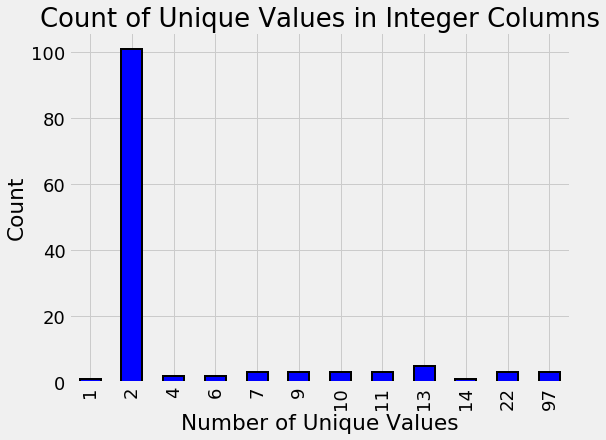

In [5]:
train.select_dtypes(np.int64).nunique().value_counts().sort_index().plot.bar(color = 'blue', 
                                                                             figsize = (8, 6),
                                                                            edgecolor = 'k', linewidth = 2);
plt.xlabel('Number of Unique Values'); plt.ylabel('Count');
plt.title('Count of Unique Values in Integer Columns');

The columns with only 2 unique values represent Booleans (0 or 1). In a lot of cases, this boolean information is already on a household level. For example, the refrig column says whether or not the household has a refrigerator. When it comes time to make features from the Boolean columns that are on the household level, we will not need to aggregate these. However, the Boolean columns that are on the individual level will need to be aggregated.  

Float Columns  
Another column type is floats which represent continuous variables. We can make a quick distribution plot to show the distribution of all float columns. We'll use an OrderedDict to map the poverty levels to colors because this keeps the keys and values in the same order as we specify (unlike a regular Python dictionary).  

The following graphs shows the distributions of the float columns colored by the value of the Target. With these plots, we can see if there is a significant difference in the variable distribution depending on the household poverty level.

===============================================================  

只有2個唯一值的列表示布爾值（0或1）。在許多情況下，此佈爾信息已處於家庭級別。例如，製冷欄顯示該家庭是否有冰箱。當需要從住戶級別的布爾列製作要素時，我們將不需要匯總這些要素。但是，單個級別的布爾列將需要聚合。

浮點數欄位  
另一列類型是浮點數，代表連續變量。我們可以做一個快速分佈圖來顯示所有浮點數列的分佈。我們將使用OrderedDict將貧困程度映射到顏色，因為這會使鍵和值保持與我們指定的順序相同（不同於常規的Python詞典）。

下圖顯示了用Target值著色的float列的分佈。通過這些圖，我們可以看到取決於家庭貧困水平的變量分佈是否存在顯著差異。

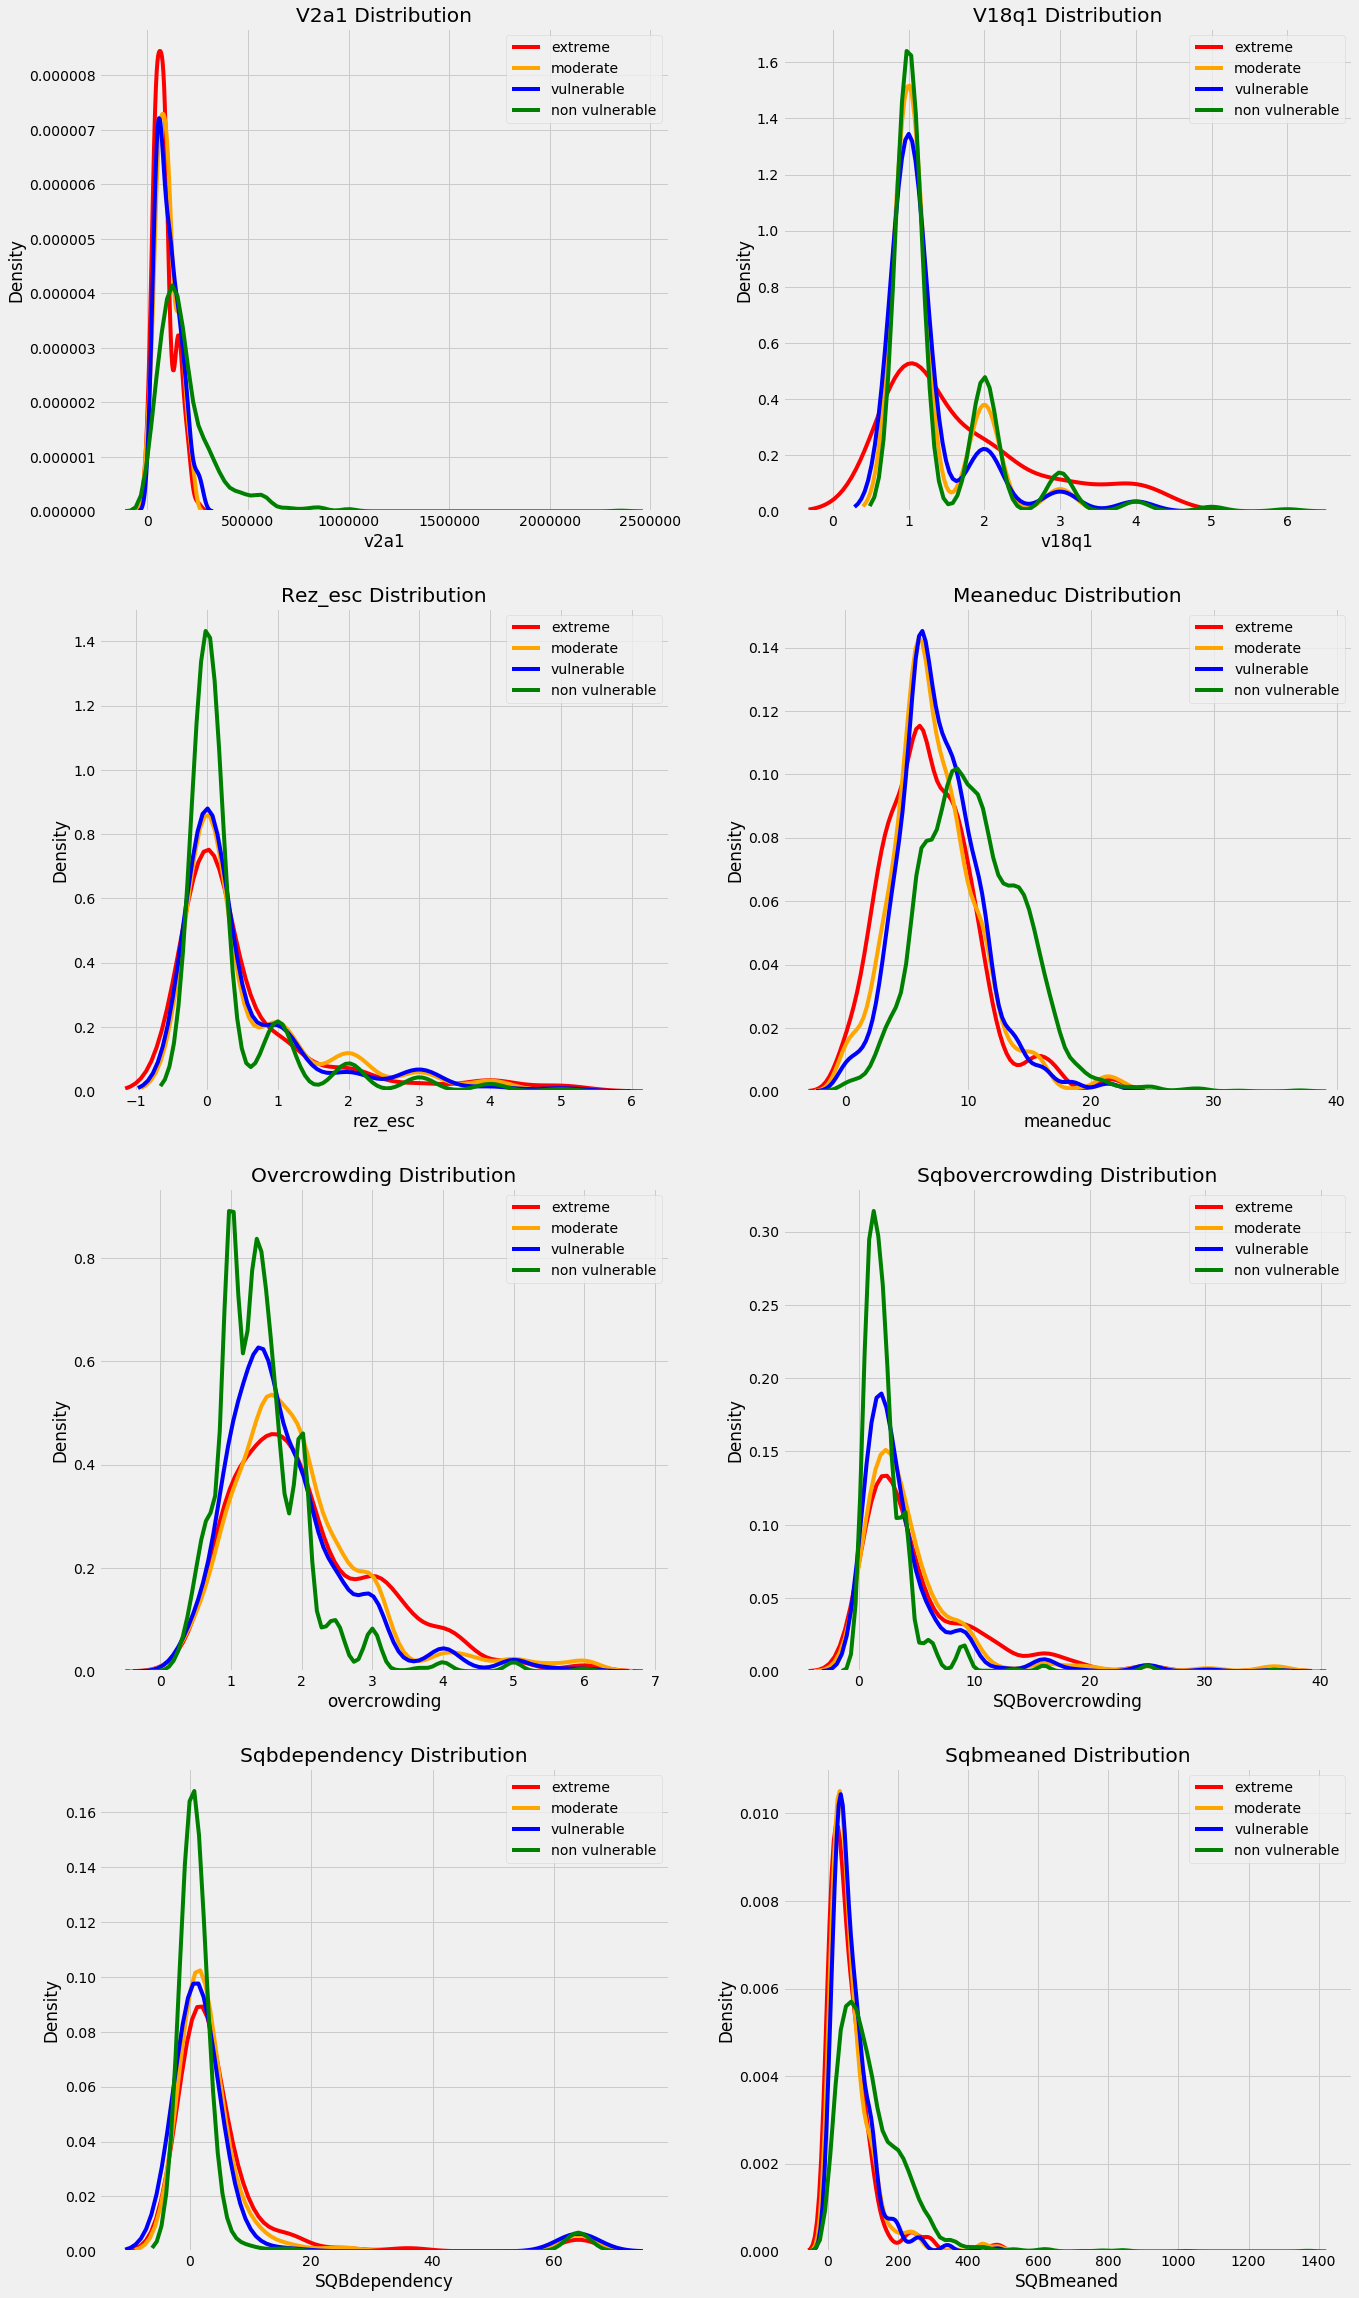

In [6]:
from collections import OrderedDict

plt.figure(figsize = (20, 16))
plt.style.use('fivethirtyeight')

# Color mapping
colors = OrderedDict({1: 'red', 2: 'orange', 3: 'blue', 4: 'green'})
poverty_mapping = OrderedDict({1: 'extreme', 2: 'moderate', 3: 'vulnerable', 4: 'non vulnerable'})

# Iterate through the float columns
for i, col in enumerate(train.select_dtypes('float')):
    ax = plt.subplot(4, 2, i + 1)
#     設定分割窗口數量
    # Iterate through the poverty levels
    for poverty_level, color in colors.items():
#         抓取colors中的等級和顏色
        # Plot each poverty level as a separate line
        sns.kdeplot(train.loc[train['Target'] == poverty_level, col].dropna(), 
#                     .dropna()刪除na
                    ax = ax, color = color, label = poverty_mapping[poverty_level])
        
    plt.title(f'{col.capitalize()} Distribution'); plt.xlabel(f'{col}'); plt.ylabel('Density')

plt.subplots_adjust(top = 2)

Later on we'll calculate correlations between the variables and the Target to gauge the relationships between the features, but these plots can already give us a sense of which variables may be most "relevant" to a model. For example, the meaneduc, representing the average education of the adults in the household appears to be related to the poverty level: a higher average adult education leads to higher values of the target which are less severe levels of poverty. The theme of the importance of education is one we will come back to again and again in this notebook!  

稍後，我們將計算變量與目標之間的相關性，以衡量要素之間的關係，但是這些圖已經可以使我們了解哪些變量可能與模型最“相關”。 例如，代表家庭中成年人平均教育水平的meanduc似乎與貧困程度有關：成年人平均教育水平越高，目標值就越高，貧困程度就越輕。 教育重要性的主題是我們將在本筆記本中一次又一次地回到主題！

In [7]:
train.select_dtypes('object').head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


The Id and idhogar object types make sense because these are identifying variables. However, the other columns seem to be a mix of strings and numbers which we'll need to address before doing any machine learning. According to the documentation for these columns:

dependency: Dependency rate, calculated = (number of members of the household younger than 19 or older than 64)/(number of member of household between 19 and 64)
edjefe: years of education of male head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0
edjefa: years of education of female head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0
These explanations clear up the issue. For these three variables, "yes" = 1 and "no" = 0. We can correct the variables using a mapping and convert to floats.  
Id和idhogar對像類型很有意義，因為它們是標識變量。 但是，其他列似乎是字符串和數字的混合，我們在進行任何機器學習之前都需要解決這些問題。 根據這些列的文檔：

dependency：依存率，計算得出=（19歲以下或64歲以上家庭成員數）/（19到64歲之間的家庭成員數）  
edjefe：基於escolari（受教育年限），戶主和性別的相互作用的男性戶主的受教育年限，是= 1，否= 0  
edjefa：女戶主的受教育年限，基於escolari（受教育年限），戶主和性別的相互作用，是= 1，否= 0  
這些解釋可以解決問題。 對於這三個變量，“ yes” = 1和“ no” =0。我們可以使用映射更正變量並將其轉換為float。

In [9]:
mapping = {"yes": 1, "no": 0}

# Apply same operation to both train and test
for df in [train, test]:
    # Fill in the values with the correct mapping
    df['dependency'] = df['dependency'].replace(mapping).astype(np.float64)
    df['edjefa'] = df['edjefa'].replace(mapping).astype(np.float64)
    df['edjefe'] = df['edjefe'].replace(mapping).astype(np.float64)

train[['dependency', 'edjefa', 'edjefe']].describe()

,dependency,edjefa,edjefe
count,9557.000000,9557.000000,9557.000000
mean,1.149550,2.896830,5.096788
std,1.605993,4.612056,5.246513
min,0.000000,0.000000,0.000000
25%,0.333333,0.000000,0.000000
50%,0.666667,0.000000,6.000000
75%,1.333333,6.000000,9.000000
max,8.000000,21.000000,21.000000


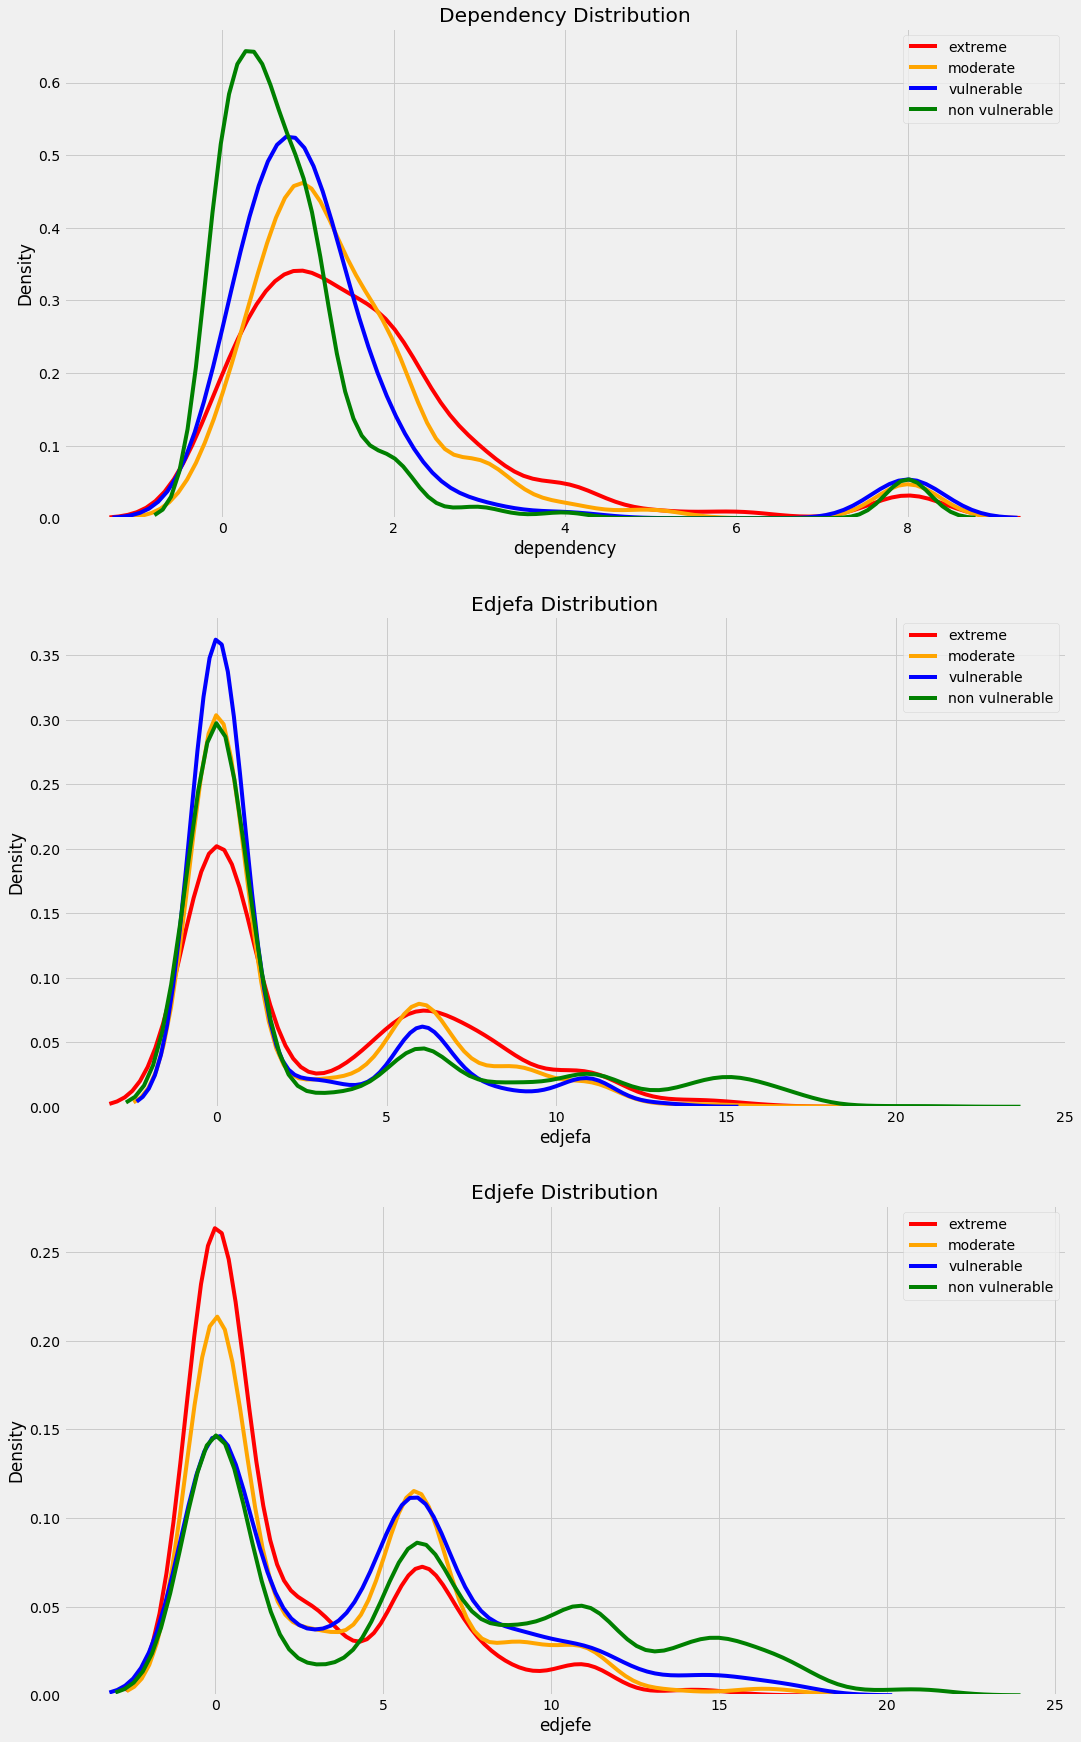

In [10]:
plt.figure(figsize = (16, 12))

# Iterate through the float columns
for i, col in enumerate(['dependency', 'edjefa', 'edjefe']):
    ax = plt.subplot(3, 1, i + 1)
    # Iterate through the poverty levels
    for poverty_level, color in colors.items():
        # Plot each poverty level as a separate line
        sns.kdeplot(train.loc[train['Target'] == poverty_level, col].dropna(), 
                    ax = ax, color = color, label = poverty_mapping[poverty_level])
        
    plt.title(f'{col.capitalize()} Distribution'); plt.xlabel(f'{col}'); plt.ylabel('Density')

plt.subplots_adjust(top = 2)